# t-tests in Python

In [1]:
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv('weights_ttests.csv')

In [3]:
df

,id,sex,start_weight,end_weight
0,1,Male,203,205
1,2,Male,180,177
2,3,Male,222,218
3,4,Male,190,190
4,5,Male,201,199
5,6,Male,185,183
6,7,Male,150,148
7,8,Male,193,190
8,9,Male,209,207
9,10,Male,213,210


## Single Sample t-test

Compares a sample to a population mean

Here, we will determine if start and end wieght differ from 200lbs

In [4]:
# Use `?` to see documentation
stats.ttest_1samp?

Signature:
stats.ttest_1samp(
    a,
    popmean,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
)
Docstring:
Calculate the T-test for the mean of ONE group of scores.

This is a two-sided test for the null hypothesis that the expected value
(mean) of a sample of independent observations `a` is equal to the given
population mean, `popmean`.

Parameters
----------
a : array_like
    Sample observation.
popmean : float or array_like
    Expected value in null hypothesis. If array_like, then it must have the
    same shape as `a` excluding the axis dimension.
axis : int or None, optional
    Axis along which to compute test; default is 0. If None, compute over
    the whole array `a`.
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan.
    The following options are available (default is 'propagate'):

      * 'propagate': returns nan
      * 'raise': throws an error
      * 'omit': performs the calculations ignorin

In [5]:
# Compare start weight to 200, returns a t-statisitic and a p-value
stats.ttest_1samp(df['start_weight'], 200)

Ttest_1sampResult(statistic=-4.255875550600782, pvalue=0.00019891539018145106)

In [10]:
# Since our p-value is less than .05, we determine that start weight differs from 200

In [6]:
stats.ttest_1samp(df['end_weight'], 200)

Ttest_1sampResult(statistic=-4.618431973564491, pvalue=7.316504651989214e-05)

In [7]:
# Since our p-value is less than .05, we determine that end weight differs from 200

## Independent Sample t-test

Compares two indepedent samples

Here, we will compare males and female start weight and end weight

In [8]:
# Subset data to get male and female data
male_data = df[df['sex']=='Male']
female_data = df[df['sex']=='Female']

In [9]:
stats.ttest_ind(male_data['start_weight'], female_data['start_weight'])

Ttest_indResult(statistic=2.1352330391527437, pvalue=0.04163023164324678)

In [ ]:
# Since our p value is less than .05, we can conclude that there is a difference
# Next let's plot the means to see the direction

<AxesSubplot:xlabel='sex'>

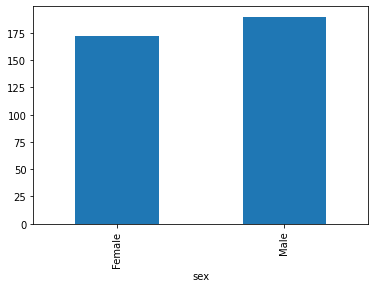

In [10]:
df.groupby('sex')['start_weight'].mean().plot(kind='bar')

In [16]:
# We can see that males weight more at start

In [11]:
# Compare end weights for males and females
stats.ttest_ind(male_data['end_weight'], female_data['end_weight'])

Ttest_indResult(statistic=1.9597312552833652, pvalue=0.06004967788419738)

In [17]:
# Since our p-value is above .05, we conclude there is not a sig diff in end weights

## Paired Sample t-test

When data is paired, such as start and end weights for an individual, we run a paired samples t-test.

Here, the question is: Do start and end weights differ?

In [12]:
stats.ttest_rel(df['start_weight'], df['end_weight'])

Ttest_relResult(statistic=2.5377569327403062, pvalue=0.016789334659992817)

In [20]:
# Since our p value is less than .05, we can conclude that there is a difference
# Next, lets plot the data to visualize the difference

In [13]:
df[['start_weight', 'end_weight']].mean()

start_weight    181.133333
end_weight      179.833333
dtype: float64

<AxesSubplot:>

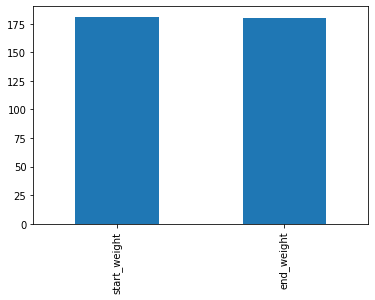

In [14]:
df[['start_weight', 'end_weight']].mean().plot(kind='bar')

In [24]:
# Although it is hard to see in the plot, end weights were on average lower than start weights